In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from colormap import Color
import datetime
import time
import mplleaflet
%matplotlib inline

#logging
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logger.debug('Test Debug')

In [2]:
# read cumtd files and make a panda dataframe from the files
# calendar_dates.txt
calendar_dates = pd.read_csv('cumtd/calendar_dates.txt')
# routes
routes = pd.read_csv('cumtd/routes.txt')
# shapes
shapes = pd.read_csv('cumtd/shapes.txt')
# stop_times
stop_times = pd.read_csv('cumtd/stop_times.txt')
# stops
stops = pd.read_csv('cumtd/stops.txt')
# trips
trips = pd.read_csv('cumtd/trips.txt')


In [3]:
calendar_dates

,service_id,date,exception_type
0,I4UISU,20170115,1
1,I4UISU,20170122,1
2,I4UISU,20170129,1
3,I4UISU,20170205,1
4,I4UISU,20170212,1
5,I4UISU,20170219,1
6,I4UISU,20170226,1
7,I4UISU,20170305,1
8,I4UISU,20170312,1
9,I4UISU,20170326,1


In [4]:
trips

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,TEAL,T4 UIMF,[@14.0.51708725@][4][1277756770140]/0__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,TEAL 26
1,TEAL,T4 UIMF,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,TEAL 23
2,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541396687]/72__T4_UIMF,EAST - ORCHARD DOWNS,0,T4 UIMF,12E TEAL 13
3,TEAL,T4 UIMF,[@7.0.41893871@][4][1243540851671]/4__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,12W TEAL 12
4,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541396687]/74__T4_UIMF,EAST - ORCHARD DOWNS,0,T4 UIMF,12E TEAL 13
5,TEAL,T4 UIMF,[@7.0.41893871@][4][1243540851671]/6__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,12W TEAL 12
6,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541488843]/110__T4_UIMF,EAST - PAR,0,T4 UIMF,TEAL 34
7,TEAL,T4 UIMF,[@14.0.51708725@][4][1275506079140]/6__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,TEAL 23
8,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541396687]/79__T4_UIMF,EAST - ORCHARD DOWNS,0,T4 UIMF,12E TEAL 13
9,TEAL,T4 UIMF,[@7.0.41893871@][4][1243540851671]/11__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,12W TEAL 12


In [5]:
routes

,xroute_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,GOLD ALT,CUMTD,10,Gold 1 Alternate,NaN,3,NaN,c7994a,000000
1,RUBY SATURDAY,CUMTD,110,Ruby Saturday,NaN,3,NaN,eb008b,000000
2,SILVER LIMITED SATURDAY,CUMTD,130,Silver Limited Saturday,NaN,3,NaN,d1d3d4,000000
3,BROWN ALT PM,CUMTD,9,Brown Alternate PM,NaN,3,NaN,823822,ffffff
4,YELLOW LATE NIGHT SUNDAY,CUMTD,100,Yellow Late Night Sunday,NaN,3,NaN,fcee1f,000000
5,GREEN EVENING SATURDAY,CUMTD,50,Green Evening Saturday,NaN,3,NaN,008063,ffffff
6,GREY ALT,CUMTD,7,Grey Alternate,NaN,3,NaN,808285,000000
7,TEAL LATE NIGHT SUNDAY,CUMTD,120,Teal Late Night Sunday,NaN,3,NaN,006991,ffffff
8,GREEN LATE NIGHT SATURDAY,CUMTD,50,Green Late Night Saturday,NaN,3,NaN,008063,ffffff
9,5E GREEN EXPRESS 1 ALT,CUMTD,5,Green Express 1 Alternate,NaN,3,NaN,008063,ffffff


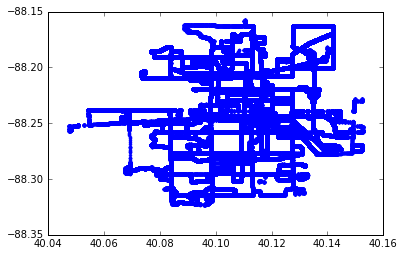

In [6]:
# draw all the shapes / route of the cumtd
plt.plot(shapes['shape_pt_lat'],shapes['shape_pt_lon'],'.')

In [7]:
# expore trips to group the route
trips
trips.shape_id.unique()
# ok we find a relation between trips and shapes
# explore route
#routes.keys()
#routes.xroute_id.unique()
#trips.route_id.unique()
#trips.keys()
#routes.iterrows()
shapes.keys()
routes.route_color.unique() 
routes[routes['route_color']=='eb008b']
#stop_times

,xroute_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
1,RUBY SATURDAY,CUMTD,110,Ruby Saturday,NaN,3,NaN,eb008b,000000
26,RUBY SUNDAY,CUMTD,110,Ruby Sunday,NaN,3,NaN,eb008b,000000
41,RUBY EVENING SATURDAY,CUMTD,110,Ruby Evening Saturday,NaN,3,NaN,eb008b,000000
44,RUBY,CUMTD,11,Ruby,NaN,3,NaN,eb008b,000000
81,RUBY EVENING,CUMTD,110,Ruby Evening,NaN,3,NaN,eb008b,000000


In [8]:
"""
sample_fig = plt.figure(figsize=(15,15));
ax = plt.subplot();
for route_idx,route in routes.iterrows():
    obs_color = route['route_color']
#    log.debug(obs_color)
    obs_rgb=Color('#'+obs_color)
#    print(obs_rgb)
    obs_trips = trips[trips['route_id']==route['xroute_id']]    
#    for trip_idx,obs_trip in obs_trips.iterrows():
    for obs_shape_id in obs_trips.shape_id.unique():                    
        obs_shape = shapes[shapes['shape_id']==obs_shape_id]
        ax.plot(obs_shape['shape_pt_lat'],obs_shape['shape_pt_lon'],'.',color=obs_rgb.hex)
"""

"\nsample_fig = plt.figure(figsize=(15,15));\nax = plt.subplot();\nfor route_idx,route in routes.iterrows():\n    obs_color = route['route_color']\n#    log.debug(obs_color)\n    obs_rgb=Color('#'+obs_color)\n#    print(obs_rgb)\n    obs_trips = trips[trips['route_id']==route['xroute_id']]    \n#    for trip_idx,obs_trip in obs_trips.iterrows():\n    for obs_shape_id in obs_trips.shape_id.unique():                    \n        obs_shape = shapes[shapes['shape_id']==obs_shape_id]\n        ax.plot(obs_shape['shape_pt_lat'],obs_shape['shape_pt_lon'],'.',color=obs_rgb.hex)\n"

In [9]:
# convert arrival and departure time into millisecond
def convertToSecond(col):
    arr_val = col
    if(int(arr_val[0:2])>=24):
        arr_val='{0:02d}'.format(int(arr_val[0:2])-24)+arr_val[2:len(arr_val)]
    x = time.strptime(arr_val, "%H:%M:%S")
    second = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
    return second

stop_times['arrival_time_ms'] = stop_times['arrival_time']\
    .apply(lambda col: convertToSecond(col))    
stop_times['departure_time_ms'] = stop_times['departure_time']\
    .apply(lambda col: convertToSecond(col))


In [10]:
# calculate travel time and add travel time into trips data frame
def getTravelTime(stop_times,trip_id):
    # filter stop_times by trip_id
    obs_stops = stop_times[stop_times['trip_id']==trip_id]
    # get minimum seq and maximum sequence of trips
    min_seq = obs_stops['stop_sequence'].min()
    max_seq = obs_stops['stop_sequence'].max()
    max_time = obs_stops[obs_stops['stop_sequence']==max_seq]['arrival_time_ms'].values[0]
    min_time = obs_stops[obs_stops['stop_sequence']==min_seq]['departure_time_ms'].values[0]
    travel_time = 0
    max_bound = convertToSecond('23:59:59')
    if min_time < max_time:
        travel_time = max_time - min_time
    else:
        travel_time = max_bound - min_time + max_time
    #print(max_seq)
    # calculate travel time
    #print(obs_stops[obs_stops['stop_sequence']==max_seq]['arrival_time_ms'].values)
    #print(obs_stops[obs_stops['stop_sequence']==min_seq]['departure_time_ms'].values)
        
    #print(travel_time)
    return travel_time

trips['travel_time'] = trips.trip_id.apply(lambda col:getTravelTime(stop_times,col))

In [11]:
# get stops frequency
def getFrequency(stop_times,trip_id):
    # filter stop_times by trip_id
    obs_stops = stop_times[stop_times['trip_id']==trip_id]
    # count the stop frequency for trips
    stop_frequency = obs_stops.groupby('trip_id')['trip_id'].count().values[0]
#    print(stop_frequency)
    return stop_frequency

trips['stop_frequency'] = trips.trip_id.apply(lambda col:getFrequency(stop_times,col))

In [12]:
# get trips travel distance
def getTravelDistance(shapes,shape_id):
    # filter stop_times by trip_id
    obs_shape = shapes[shapes['shape_id']==shape_id]
    # count the stop frequency for trips
    travel_distance = obs_shape.groupby('shape_id')['shape_dist_traveled'].sum().values[0]
#    print(stop_frequency)
    return travel_distance

trips['travel_distance'] = trips.shape_id.apply(lambda col:getTravelDistance(shapes,col))    

## CUMTD (All Route)

## TODO: Yiting add some Introduction here

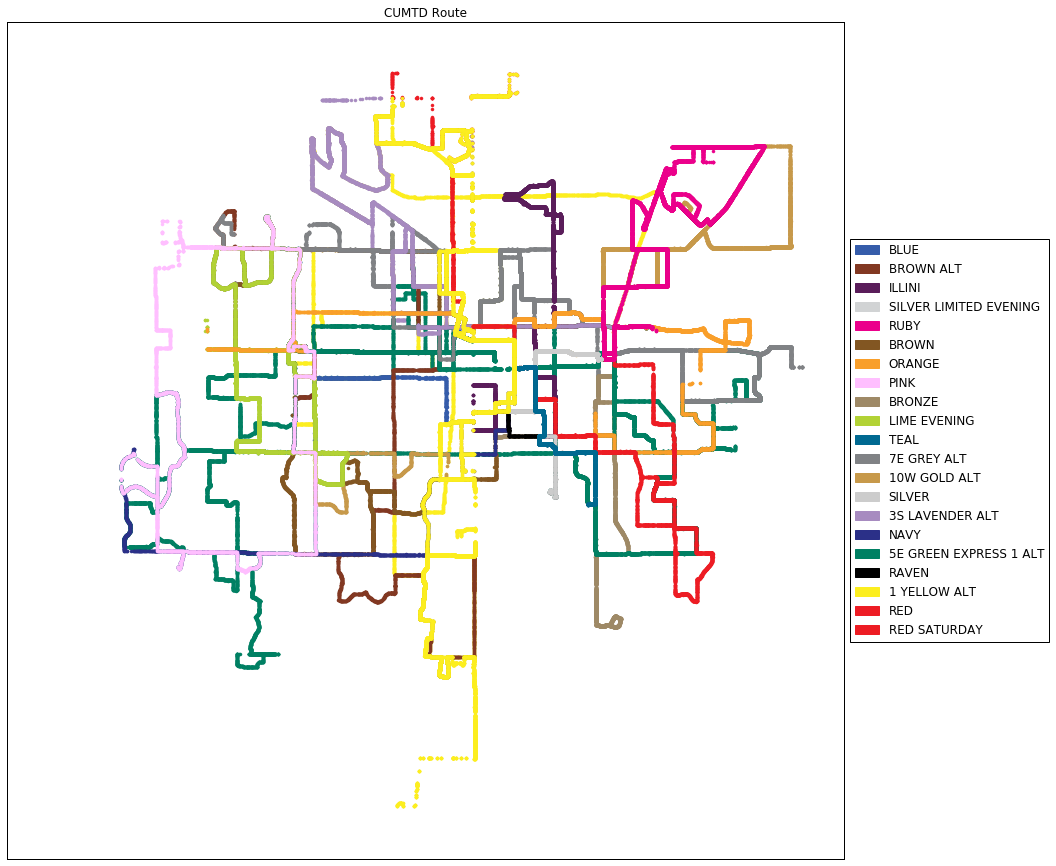

In [13]:
def draw_plot_lambda(routes,shapes,route_id,shape_id,ax,color_legends = {}):
#    obs_route = routes[routes['xroute_id']==route_id]
    obs_color = routes[routes['xroute_id']==route_id]['route_color'].values[0]
    obs_rgb=Color('#'+obs_color)
    # record colors, because one colors can be used by many routes
    if obs_color not in color_legends:
        color_legends[obs_color] = []
    color_legends[obs_color].append(route_id)
    obs_shape = shapes[shapes['shape_id']==shape_id]
    ax.plot(obs_shape['shape_pt_lon'],obs_shape['shape_pt_lat'],'.',color=obs_rgb.hex)
    
def filterTrips(x,trips):
#    print(x.name)
    print(trips[(trips['route_id']==x.name)&(trips['stop_frequency']==x.stop_frequency)])
    return trips[(trips['route_id']==x.name)&(trips['stop_frequency']==x.stop_frequency)]
    
def draw_plot(routes,trips):
    color_legends = {}
    sample_fig = plt.figure(figsize=(15,15));
    ax = plt.subplot();
    # get the maximum stop_frequency from trips to get
    # the maximum trips, saving time instead of ploting all the trips    
    trips_max = trips.groupby('route_id')['stop_frequency'].max()
    
    
    obs_shape_arr = []
    for trip_idx,trip_val in trips_max.iteritems():
        test_trips = trips[(trips['route_id']==trip_idx)&(trips['stop_frequency']==trip_val)]
#        print(test_trips.iloc[0]['shape_id'])
        if test_trips.shape[0] > 0 :
            obs_shape_arr.append((trip_idx,test_trips.iloc[0]['shape_id']))            
#    print(obs_shape_arr)
    #trips.apply(lambda row: draw_plot_lambda(routes,row['route_id'],row['shape_id'],ax),axis=1)
    #obs_shape_arr.apply(lambda row: draw_plot_lambda(routes,row['route_id'],row['shape_id'],ax),axis=1)
    [draw_plot_lambda(routes,shapes,x,y,ax,color_legends) for x,y in obs_shape_arr]
    #mplleaflet.display()
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    #ax.xaxis.set_ticks([])
    #ax.yaxis.set_ticks([])
    
    return sample_fig,ax,color_legends

    """
    for trip_idx,obs_trips in trips.iterrows():
        obs_color = routes[routes['xroute_id']==obs_trips['route_id']]['route_color'].values[0]
        obs_rgb=Color('#'+obs_color)
        obs_shape = shapes[shapes['shape_id']==obs_trips.shape_id]
        ax.plot(obs_shape['shape_pt_lat'],obs_shape['shape_pt_lon'],'.',color=obs_rgb.hex)
    """     

# plot all the routes
figure,ax,color_legends = draw_plot(routes,trips)
# draw the legends
patch_array = []
route_colors = {}
for key,val in color_legends.items():
    patch_array.append(mpl.patches.Patch(color='#'+key,label=val[0]))
    for x in val:
        route_colors[x] = key

ax.legend(handles=patch_array, loc='center left', bbox_to_anchor=(1, 0.5)) 
ax.set_title('CUMTD Route')
#mplleaflet.display()
plt.show()

# 1st Visualization:
In our first visualization we want to visualize which route has the most frequent buses over the weekly schedule between work hours range (08:00 - 17:00)

## TODO: Yiting add some description here

In [14]:
# Most frequent route
# this is slow algorith

# filter our observation stoptime which has departure_time > 08:00 and arrival_time <17:00
#datetime.datetime.strptime(, "H:%M:%S")
"""
x = datetime.datetime.strptime('00:00:00,000'.split(',')[0],'%H:%M:%S')
for stopidx,stopval in stop_times.iterrows():
    #print(arr_val[0:2])
    arr_val = stopval['arrival_time']
    dep_val = stopval['departure_time']
    if(int(arr_val[0:2])>=24):
        arr_val='{0:02d}'.format(int(arr_val[0:2])-24)+arr_val[2:len(arr_val)]        
    if(int(dep_val[0:2])>=24):
        dep_val='{0:02d}'.format(int(dep_val[0:2])-24)+dep_val[2:len(dep_val)]        
    x = time.strptime(arr_val, "%H:%M:%S")
    stopval['arrival_time_ms'] = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
    x = time.strptime(dep_val, "%H:%M:%S")
    stopval['departure_time_ms'] = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
"""
#stop_times['arrival_time_ms'] = stop_times['arrival_time']

'\nx = datetime.datetime.strptime(\'00:00:00,000\'.split(\',\')[0],\'%H:%M:%S\')\nfor stopidx,stopval in stop_times.iterrows():\n    #print(arr_val[0:2])\n    arr_val = stopval[\'arrival_time\']\n    dep_val = stopval[\'departure_time\']\n    if(int(arr_val[0:2])>=24):\n        arr_val=\'{0:02d}\'.format(int(arr_val[0:2])-24)+arr_val[2:len(arr_val)]        \n    if(int(dep_val[0:2])>=24):\n        dep_val=\'{0:02d}\'.format(int(dep_val[0:2])-24)+dep_val[2:len(dep_val)]        \n    x = time.strptime(arr_val, "%H:%M:%S")\n    stopval[\'arrival_time_ms\'] = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()\n    x = time.strptime(dep_val, "%H:%M:%S")\n    stopval[\'departure_time_ms\'] = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()\n'

In [15]:
# get mean time and travel_distance for each route
def meanTimeRoute(col,trips):
#    print(row)
    obs_trip = trips[trips['route_id']==col]
    mean_time = obs_trip.groupby('route_id')['travel_time'].mean()
#    print(mean_time.shape[0])
    if mean_time.shape[0] > 0:
        mean_time = mean_time[0]
    else:
        mean_time = 0
    return mean_time

def meanDistRoute(col,trips):
#    print(row)
    obs_trip = trips[trips['route_id']==col]
    mean_dist = obs_trip.groupby('route_id')['travel_distance'].mean()
    if mean_dist.shape[0] > 0 :
        mean_dist = mean_dist[0]
    else:
        mean_dist = 0
    return mean_dist

def meanStopFreq(col,trips):
    obs_trip = trips[trips['route_id']==col]
    mean_stop = obs_trip.groupby('route_id')['stop_frequency'].mean()
    if mean_stop.shape[0] > 0 :
        mean_stop = mean_stop[0]
    else:
        mean_stop = 0
    return mean_stop    
    
routes['mean_time'] = routes.xroute_id.apply(lambda col: meanTimeRoute(col,trips))
routes['mean_dist'] = routes.xroute_id.apply(lambda col: meanDistRoute(col,trips))
routes['mean_stop'] = routes.xroute_id.apply(lambda col: meanStopFreq(col,trips))

In [16]:
# filter from stop_time arrival time that has 08:00 until 17:00 value
low_time = convertToSecond('08:00:00')
high_time = convertToSecond('17:00:00')
stop_mask = (stop_times['arrival_time_ms']>=low_time) & (stop_times['arrival_time_ms']<=high_time)
stop_obs = stop_times[stop_mask]


In [17]:
# filter trip_id based on the stop_obs and collect the frequency based on route
def filterTripsById(trips,trip_id):
    return(trips[trips['trip_id'].isin(trip_id)])

trips_obs = filterTripsById(trips,stop_obs['trip_id'].unique())
#trips_obs = stop_obs['trip_id'].unique().map(lambda x:filterTripsById(trips,x))

In [18]:
# get the total trips by route_id
# and order the total
top_10_route = trips_obs.groupby('route_id')['route_id'].count().sort_values(ascending=False)
color_count = 0
top_10_color_hash = {}
top_10_color_idx = []
top_10_color_set = []
for idx,val in top_10_route.iteritems():
    if route_colors[idx] not in top_10_color_hash:
        top_10_color_hash[route_colors[idx]] = (idx,val,route_colors[idx])
        top_10_color_idx.append(idx)
        top_10_color_set.append((idx,val,route_colors[idx]))
        color_count+=1
    if color_count >= 10:
        break;        

In [19]:
top_10_route

route_id
SILVER                     276
TEAL                       184
ILLINI                     175
TEAL SATURDAY              168
YELLOWHOPPER               114
ILLINI LIMITED SATURDAY    111
TEAL SUNDAY                102
YELLOW SATURDAY             98
GREY SATURDAY               91
GREEN SATURDAY              89
YELLOW                      86
GOLD                        70
GOLDHOPPER                  69
ILLINI LIMITED SUNDAY       68
GREY                        62
LAVENDER                    62
LIME SATURDAY               58
SILVER SATURDAY             56
YELLOW SUNDAY               56
SILVER LIMITED SATURDAY     55
ORANGE                      55
GREEN                       54
BLUE                        53
SILVER SUNDAY               48
BRONZE                      47
SILVER LIMITED SUNDAY       47
RED                         47
GREY SUNDAY                 45
GREENHOPPER                 45
GREEN SUNDAY                44
                          ... 
ILLINI LIMITED              37

In [20]:
# filter trip by route
def filterTripsByRoute(trips,route_id):
    return(trips[trips['route_id'].isin(route_id)])

#trips_top_10 = filterTripsByRoute(trips_obs,top_10_route.index)
trips_top_10 = filterTripsByRoute(trips_obs,top_10_color_idx)

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


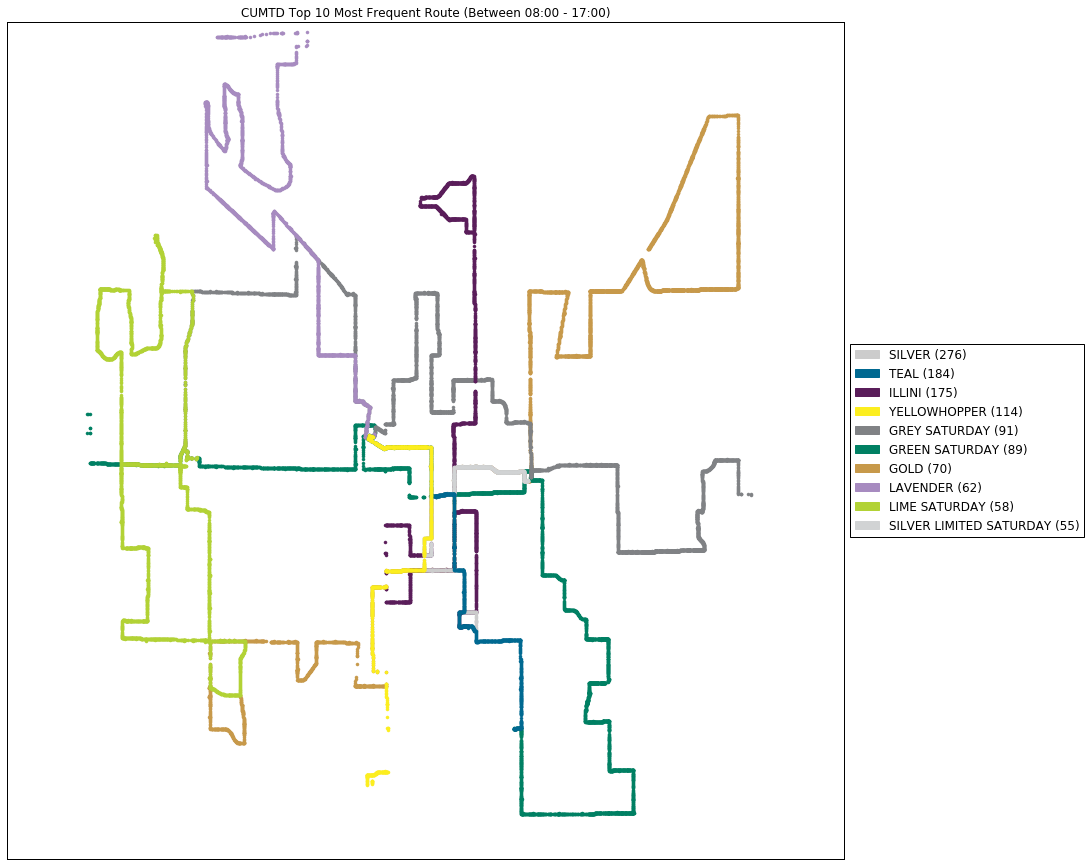

In [21]:
trips_top_10['stop_frequency'] = trips_top_10.trip_id.apply(lambda col:getFrequency(stop_times,col))
figure,ax,color_legends = draw_plot(routes,trips_top_10)
# draw the legends
patch_array = []
for val in top_10_color_set:
    patch_array.append(mpl.patches.Patch(color='#'+val[2],label='{} ({})'.format(val[0],val[1])))

ax.legend(handles=patch_array, loc='center left', bbox_to_anchor=(1, 0.5)) 

ax.set_title('CUMTD Top 10 Most Frequent Route (Between 08:00 - 17:00)')
#mplleaflet.display()
plt.show()

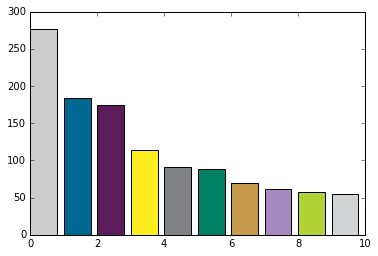

In [22]:
i = 0
patch_array = []
for val in top_10_color_set:
    plt.bar(i,val[1],color='#'+val[2])
    i+=1


(array([ 26.,  19.,   8.,   5.,   2.,   0.,   3.,   0.,   0.,   1.]),
 array([   1. ,   28.5,   56. ,   83.5,  111. ,  138.5,  166. ,  193.5,
         221. ,  248.5,  276. ]),
 <a list of 10 Patch objects>)

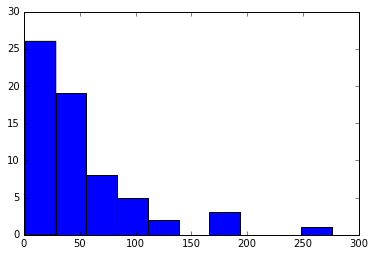

In [23]:
plt.hist(top_10_route)

In [24]:
list(range(1,11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## 2. Stops Observation
In this visualization we observe Stops density, which stops has most frequent buses coming
for the time schedule range

# TODO : Yiting add some descriptions here
## 2.a Stop density visualization, visualize Density of a stop based on CUMTD schedule

In [27]:
## Stops observation
# get the top 10 stop density as our observation data
topConstant = 5
stop_all_density = stop_times.groupby('stop_id')['stop_id'].count()
stop_top_10_density = stop_times.groupby('stop_id')['stop_id'].count().sort_values(ascending=False)[0:topConstant]
stop_top_10_obs = stop_times[stop_times['stop_id'].isin(list(stop_top_10_density.index))]

In [29]:
plt.figure(figsize=(15,15));
# copy the observation stops and match it with frequency
obs_stops = stops.copy()
stop_times['arrival_time_ms'] = stop_times['arrival_time']\
    .apply(lambda col: convertToSecond(col))
obs_stops['frequency'] = obs_stops['stop_id'].apply(lambda col: stop_all_density[col])
#plt.hexbin(obs_stops['stop_lon'],obs_stops['stop_lat'],obs_stops['frequency'])

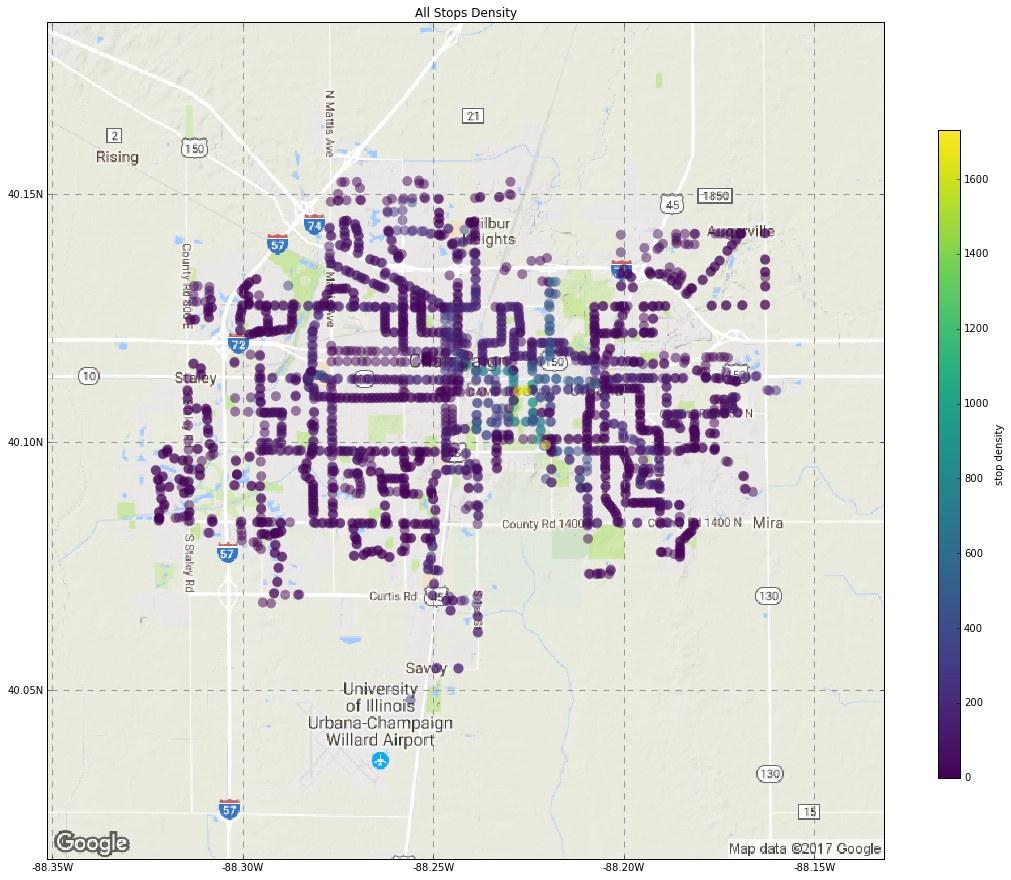

In [45]:
import salem
import motionless
from salem import get_demo_file, DataLevels, GoogleVisibleMap, Map

# Plot stops according to its frequency using color map
# plt.plot(stops['stop_lon'], stops['stop_lat'], '.') # Draw blue line
fig=plt.figure(figsize=(15,15))
#plt.axis([0,400,0,400])
ax=fig.add_subplot(1,1,1)
min_freq = obs_stops.frequency.min()
max_freq = obs_stops.frequency.max()
min_lon = obs_stops['stop_lon'].min()
max_lon = obs_stops['stop_lon'].max()
min_lat = obs_stops['stop_lat'].min()
max_lat = obs_stops['stop_lat'].max()
g = GoogleVisibleMap(x=[min_lon, max_lon], y=[min_lat, max_lat],
                     maptype='terrain')  # satellitetry out also: 'terrain'


# the google static image is a standard rgb image
ggl_img = g.get_vardata()
#ax.imshow(ggl_img)
# make a map of the same size as the image (no country borders)
sm = Map(g.grid, factor=1, countries=False)
sm.set_rgb(ggl_img)  # add the background rgb image
sm.visualize(ax=ax)  # plot it
x, y = sm.grid.transform(obs_stops['stop_lon'], obs_stops['stop_lat'])
scatt = ax.scatter(x,y,c=obs_stops.frequency,cmap=plt.get_cmap('viridis'),vmin=0,vmax=max_freq,s=100,alpha=0.5,edgecolors='none')

norm = mpl.colors.Normalize(vmin=0, vmax=max_freq)
cmap = plt.get_cmap('viridis')
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, spacing='proportional')
cb.set_label('stop density')
ax.set_title('All Stops Density')

plt.show()

## 2.b. Most frequent stop according to statistics
Visualization above displays all stops with their frequency, Now we interested in displaying the most frequent route only by filtering the stops that has frequency above the (mean + 1 standard deviation)
## TODO: Yiting add more description here

(array([  2.14100000e+03,   2.31000000e+02,   7.20000000e+01,
          1.00000000e+01,   2.50000000e+01,   9.00000000e+00,
          2.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          5.00000000e+00]),
 array([  1.00000000e+00,   1.74100000e+02,   3.47200000e+02,
          5.20300000e+02,   6.93400000e+02,   8.66500000e+02,
          1.03960000e+03,   1.21270000e+03,   1.38580000e+03,
          1.55890000e+03,   1.73200000e+03]),
 <a list of 10 Patch objects>)

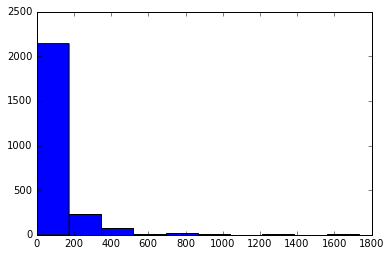

In [80]:
plt.hist(obs_stops.frequency)

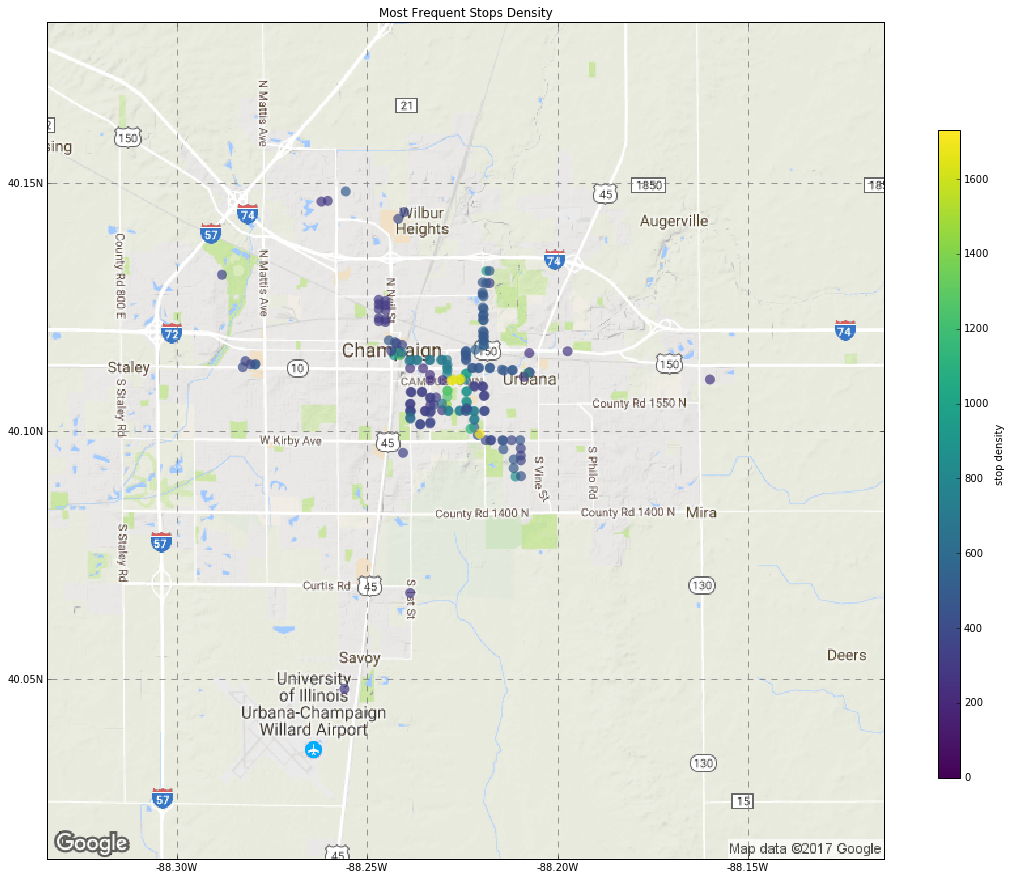

In [47]:
# filter out obs_stops that less than the frequency mean to 
# get frequent stops above all
obs_stops_frequent = obs_stops[obs_stops.frequency>(obs_stops.frequency.mean()+obs_stops.frequency.std())]

# Plot stops according to its frequency using color map
fig=plt.figure(figsize=(15,15))
#plt.axis([0,400,0,400])
ax=fig.add_subplot(1,1,1)
min_freq = obs_stops.frequency.min()
max_freq = obs_stops.frequency.max()
min_lon = obs_stops_frequent['stop_lon'].min()
max_lon = obs_stops_frequent['stop_lon'].max()
min_lat = obs_stops_frequent['stop_lat'].min()
max_lat = obs_stops_frequent['stop_lat'].max()
g = GoogleVisibleMap(x=[min_lon, max_lon], y=[min_lat, max_lat],
                     maptype='terrain')  # satellitetry out also: 'terrain'

# the google static image is a standard rgb image
ggl_img = g.get_vardata()
#ax.imshow(ggl_img)
# make a map of the same size as the image (no country borders)
sm = Map(g.grid, factor=1, countries=False)
sm.set_rgb(ggl_img)  # add the background rgb image
sm.visualize(ax=ax)  # plot it
x, y = sm.grid.transform(obs_stops_frequent['stop_lon'], obs_stops_frequent['stop_lat'])
scatt = ax.scatter(x,y,c=obs_stops_frequent.frequency,cmap=plt.get_cmap('viridis'),vmin=min_freq,vmax=max_freq,s=100,alpha=0.7,edgecolors='none')

# make it nice
norm = mpl.colors.Normalize(vmin=0, vmax=max_freq)
cmap = plt.get_cmap('viridis')
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, spacing='proportional')
cb.set_label('stop density')
ax.set_title('Most Frequent Stops Density')


plt.show()

## 2.c Frequency of Bus coming to a stop over period of time (bining)
Beside stop density, we want to give visualization about the bus frequency that stop over the top 5 most frequent stops over time (time bining)
# TODO: Yiting add more description here

In [106]:
stops

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
0,KBYWSFLD:3,MTD4346,Kirby & Westfield (South Side),NaN,40.098248,-88.290173,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
1,PHILOMI:4,MTD1026,Philo & Michigan (NW Corner),NaN,40.101792,-88.190865,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
2,DNCNCLKRD:2,MTD3333,Duncan & Clark (SE Corner),NaN,40.117390,-88.295470,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
3,TRLSPHILO:1,MTD6424,Trails & Philo (NE Corner),NaN,40.077915,-88.190315,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
4,RMNERKA:4,MTD4040,Romine & Eureka (NW Corner),NaN,40.125585,-88.227525,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
5,IRNWDSTLY:4,MTD0429,Ironwood & Staley (NW Corner),NaN,40.089826,-88.314226,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
6,5THCLMBA:4,MTD2036,Fifth & Columbia (NW Corner),NaN,40.121308,-88.232153,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
7,KRBYGLNSHR:1,MTD9073,Kirby & Glenshire (NE Corner),NaN,40.098683,-88.311765,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
8,WDSRMTRY:3,MTD2774,Windsor & Monterey (SW Corner),NaN,40.083500,-88.253890,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
9,GC:2,MTD2437,Ginger Creek (North Side),NaN,40.113025,-88.292158,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN


/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


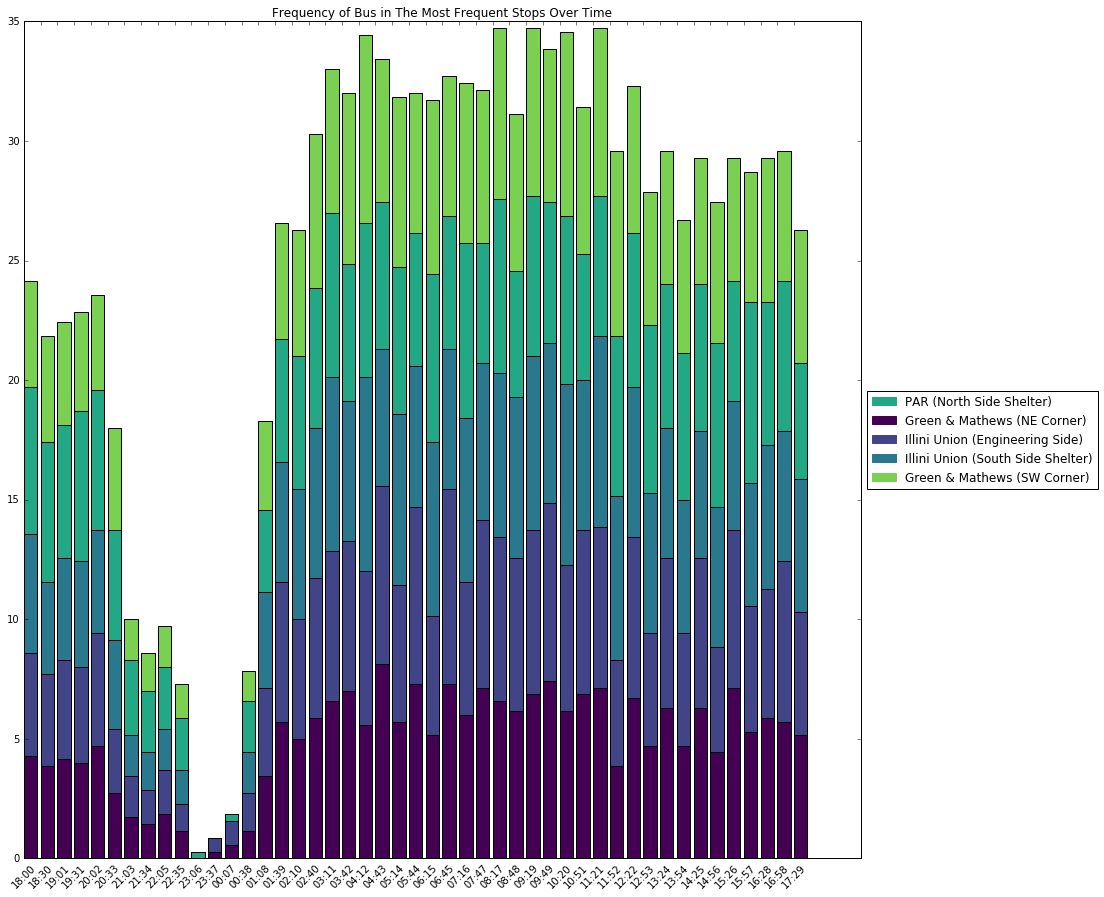

In [128]:
# bin the arrival time for every 30 minutes bin
binConstant = convertToSecond('00:30:00')
#low_time = stop_top_10_obs.arrival_time_ms.min()
#high_time = stop_top_10_obs.arrival_time_ms.max()
low_time = convertToSecond('00:00:00')
high_time = convertToSecond('23:59:59')
binNum = (high_time-low_time)/binConstant
# go through all the stop id and make bining for every 30 minutes
stop_top_10_name = stop_top_10_obs.stop_id.unique()

# to bin we need to make range between low_time, high_time and binConstant step
bin_steps = np.linspace(low_time,high_time,binNum+1)
stop_bin_arr = []
x_labels = []
for i in range(len(bin_steps)-1):
#    print(i)
    bin_obs = stop_top_10_obs[(stop_top_10_obs['arrival_time_ms']>=bin_steps[i])&(stop_top_10_obs['arrival_time_ms']<bin_steps[i+1])]    
    stop_bin_arr.append(bin_obs.groupby('stop_id')['stop_id'].count())
    # calculate label
    x_labels.append(datetime.datetime.fromtimestamp(bin_steps[i]).strftime('%H:%M'))

# convert this back into stop id keys data
stop_time_series = {}
for name in stop_top_10_name:
    stop_time_series[name] = []
    
for stop_bin in stop_bin_arr:
    for name in stop_top_10_name:
        if name in stop_bin.index:
            stop_time_series[name].append(stop_bin[name])
        else:
            stop_time_series[name].append(0)

stop_full_name = [stops[stops.stop_id==x]['stop_name'].values[0] for x in stop_top_10_name]
            
# plot the stop_bin_arr using line plot in time series window

# define colors
norm = mpl.colors.Normalize(vmin=0,vmax=len(stop_time_series.keys()))
colorArr = {}
color='viridis'
# define color map for all categories
cm = plt.get_cmap(color)
i = 0
for key in stop_time_series.keys():
    color = cm(norm(i))
    colorArr[key] = color
    i+=1

sample_fig = plt.figure(figsize=(15,15));
ax = plt.subplot();
prev = np.zeros(len(stop_time_series[stop]))
for stop in stop_time_series.keys():    
    #ax.plot(list(range(0,len(stop_time_series[stop]))),stop_time_series[stop],'-')
    # because this is weekly schedule, we divide it by 7 (days for a week)
    #stop_plot = np.divide(np.array(stop_time_series[stop]),7)
    stop_plot = np.array(stop_time_series[stop])/7
    ax.bar(list(range(0,len(stop_time_series[stop]))),stop_plot.tolist(),color = colorArr[stop],bottom=prev.tolist())
    prev = stop_plot + prev
#print(x_labels)        
xticks = plt.xticks(range(len(stop_time_series[stop])),x_labels,rotation=45)


# draw the legends
patch_array = []
for i in range(len(stop_top_10_name)):
    patch_array.append(mpl.patches.Patch(color=colorArr[stop_top_10_name[i]],label='{}'.format(stop_full_name[i])))

leg = ax.legend(handles=patch_array, loc='center left', bbox_to_anchor=(1, 0.5)) 
ax.set_title('Frequency of Bus in The Most Frequent Stops Over Time')
#ax.set_xticks(range(len(stop_time_series[stop])),x_labels)

## 3. Travel Time vs Stop Frequency and Travel Distance
In this plot we try to give a trend plot that compares between Travel Time vs Stop Frequency and Travel Distance
## TODO: Yiting please add description here

In [126]:
#plt.figure(figsize=(15,15));
#plt.hist((trips['travel_time']/60))

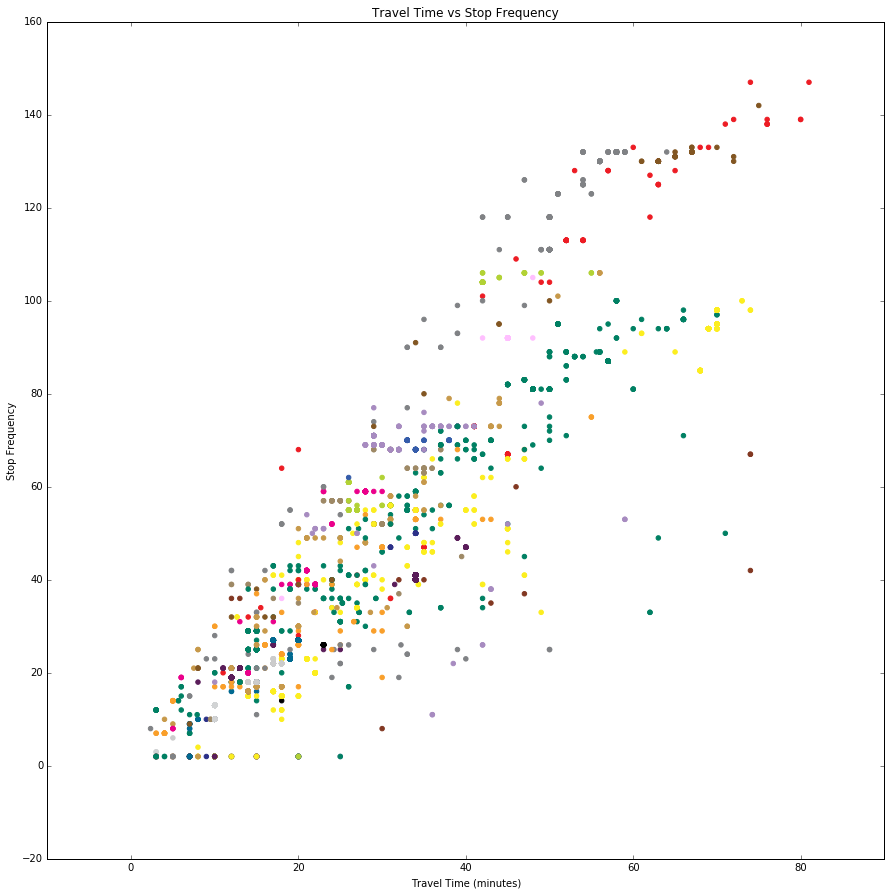

In [143]:
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(1,1,1)

trips_colors = trips['route_id'].apply(lambda col: '#'+route_colors[col])

ax.scatter((trips['travel_time']/60),trips['stop_frequency'],color=trips_colors)
ax.set_xlabel('Travel Time (minutes)')
ax.set_ylabel('Stop Frequency')
ax.set_title('Travel Time vs Stop Frequency')

In [136]:
# histogram of travel_distance
#plt.figure(figsize=(15,15));
#plt.hist((trips['travel_distance']))

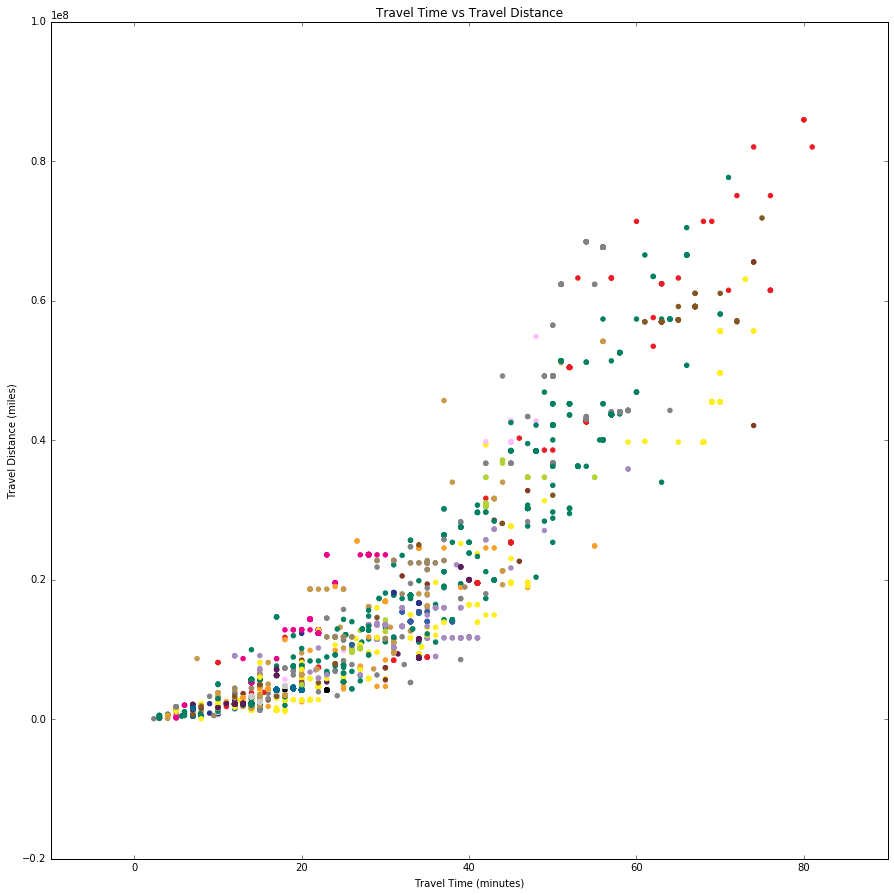

In [145]:
# relation between travel_time and travel_distance
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(1,1,1)

trips_colors = trips['route_id'].apply(lambda col: '#'+route_colors[col])
ax.scatter((trips['travel_time']/60),trips['travel_distance'],color=trips_colors)
ax.set_xlabel('Travel Time (minutes)')
ax.set_ylabel('Travel Distance (miles)')
ax.set_title('Travel Time vs Travel Distance')

plt.show()

In [122]:
#trips[trips.travel_time<0]
#trips[trips['travel_time']<=0]
#stop_times[stop_times['trip_id']=='[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF']

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,arrival_time_ms,departure_time_ms
3020,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,23:55:00,23:55:00,IT:5,0,NaN,0,0,86100.0,86100.0
3021,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,23:56:24,23:56:24,LGN1ST:3,1,NaN,0,0,86184.0,86184.0
3022,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,23:56:52,23:56:52,WHT2ND:3,2,NaN,0,0,86212.0,86212.0
3023,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,23:57:36,23:57:36,WHT4TH:3,3,NaN,0,0,86256.0,86256.0
3024,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,23:58:24,23:58:24,WHT6TH:3,4,NaN,0,0,86304.0,86304.0
3025,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,23:58:52,23:58:52,WHTWRT:3,5,NaN,0,0,86332.0,86332.0
3026,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,23:59:48,23:59:48,WRTSPFLD:4,6,NaN,0,0,86388.0,86388.0
3027,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,24:00:36,24:00:36,WRTHLY:4,7,NaN,0,0,36.0,36.0
3028,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,24:02:00,24:02:00,IU:1,8,NaN,0,0,120.0,120.0
3029,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,24:02:40,24:02:40,GRNMAT:3,9,NaN,0,0,160.0,160.0


In [123]:
# get mean time and travel_distance for each route

def meanTimeRoute(col,trips):
#    print(row)
    obs_trip = trips[trips['route_id']==col]
    mean_time = obs_trip.groupby('route_id')['travel_time'].mean()
#    print(mean_time.shape[0])
    if mean_time.shape[0] > 0:
        mean_time = mean_time[0]
    else:
        mean_time = 0
    return mean_time

def meanDistRoute(col,trips):
#    print(row)
    obs_trip = trips[trips['route_id']==col]
    mean_dist = obs_trip.groupby('route_id')['travel_distance'].mean()
    if mean_dist.shape[0] > 0 :
        mean_dist = mean_dist[0]
    else:
        mean_dist = 0
    return mean_dist

def meanStopFreq(col,trips):
    obs_trip = trips[trips['route_id']==col]
    mean_stop = obs_trip.groupby('route_id')['stop_frequency'].mean()
    if mean_stop.shape[0] > 0 :
        mean_stop = mean_stop[0]
    else:
        mean_stop = 0
    return mean_stop    
    
routes['mean_time'] = routes.xroute_id.apply(lambda col: meanTimeRoute(col,trips))
routes['mean_dist'] = routes.xroute_id.apply(lambda col: meanDistRoute(col,trips))
routes['mean_stop'] = routes.xroute_id.apply(lambda col: meanStopFreq(col,trips))

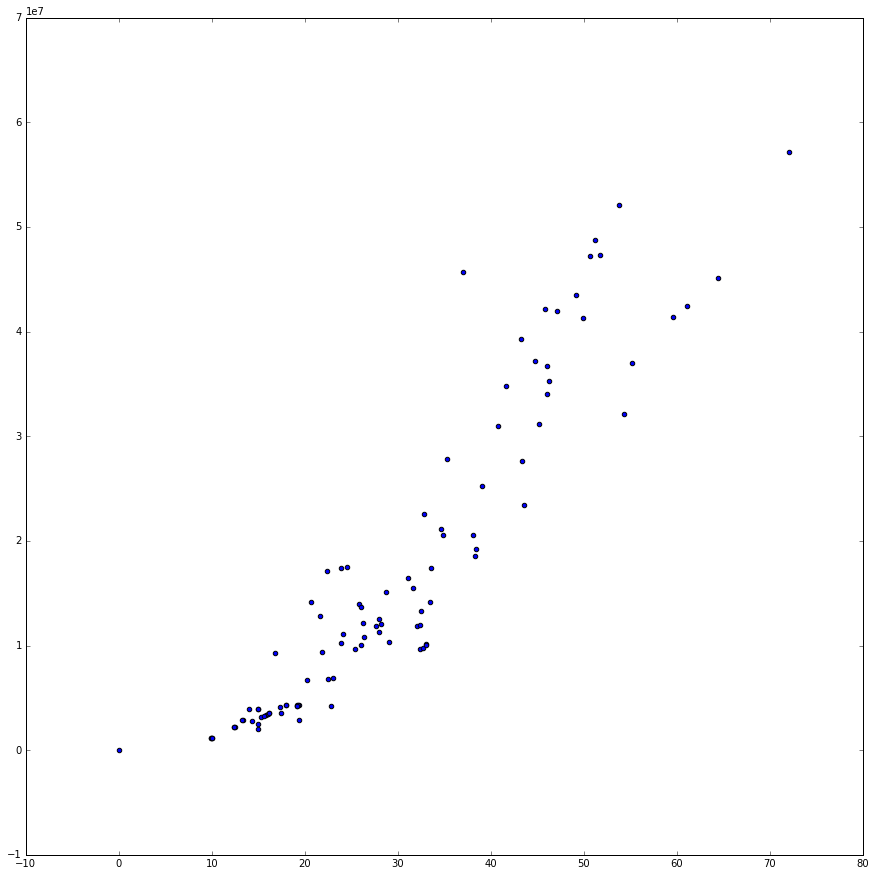

In [124]:
plt.figure(figsize=(15,15));
plt.scatter((routes['mean_time']/60),routes['mean_dist'])

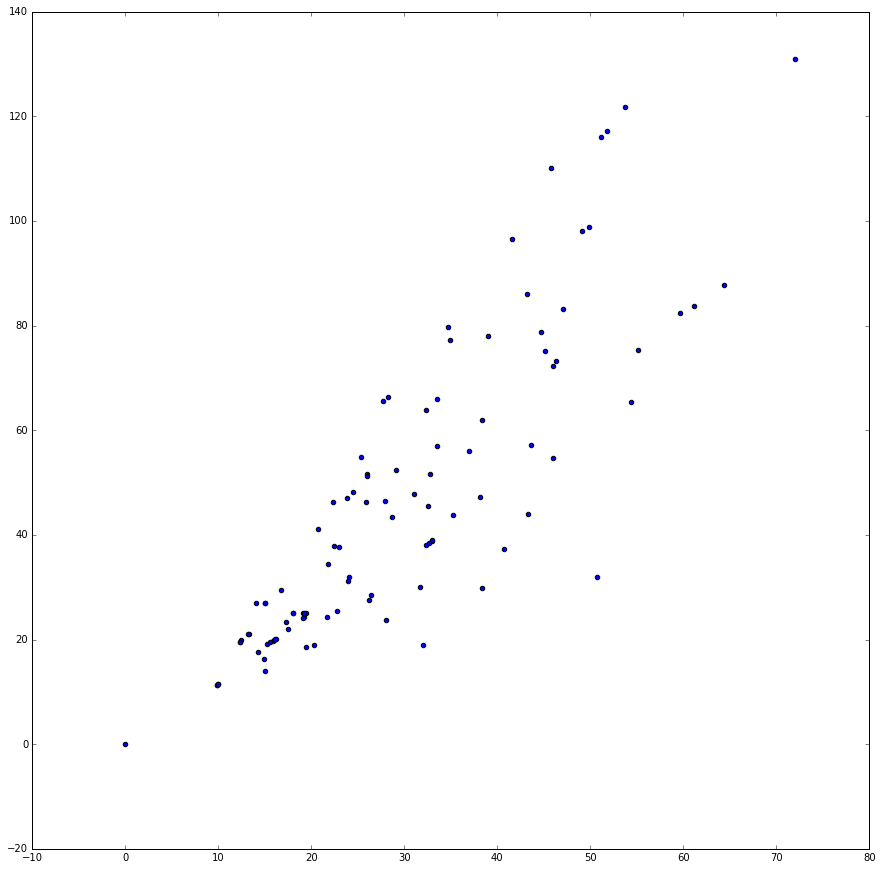

In [125]:
plt.figure(figsize=(15,15));
plt.scatter((routes['mean_time']/60),routes['mean_stop'])

In [130]:
route_colors

{'1 YELLOW ALT': 'fcee1f',
 '10W GOLD ALT': 'c7994a',
 '1N YELLOW ALT': 'fcee1f',
 '1N YELLOW ALT PM': 'fcee1f',
 '1S YELLOW ALT': 'fcee1f',
 '3S LAVENDER ALT': 'a78bc0',
 '5E GREEN EXPRESS 1 ALT': '008063',
 '5E GREEN EXPRESS ALT': '008063',
 '5W GREEN ALT 2': '008063',
 '5W GREEN EXPRESS 2': '008063',
 '7E GREY ALT': '808285',
 '7W GREY ALT': '808285',
 'BLUE': '355caa',
 'BRONZE': '9e8966',
 'BRONZE ALT': '9e8966',
 'BROWN': '825622',
 'BROWN ALT': '823822',
 'BROWN ALT PM': '823822',
 'BROWN ALT1': '825622',
 'GOLD': 'c7994a',
 'GOLD ALT': 'c7994a',
 'GOLDHOPPER': 'c7994a',
 'GREEN': '008063',
 'GREEN ALT': '008063',
 'GREEN EVENING': '008063',
 'GREEN EVENING SATURDAY': '008063',
 'GREEN EXPRESS': '008063',
 'GREEN EXPRESS ALT': '008063',
 'GREEN LATE NIGHT': '008063',
 'GREEN LATE NIGHT SATURDAY': '008063',
 'GREEN LATE NIGHT SUNDAY': '008063',
 'GREEN SATURDAY': '008063',
 'GREEN SUNDAY': '008063',
 'GREENHOPPER': '008063',
 'GREENHOPPER EVENING': '008063',
 'GREENHOPPER EVENING